### Name : Ayodya W.K.H
### Index Number : 190065K

### Question 1
Fit Houghlines to the Soduko image in Fig.1.

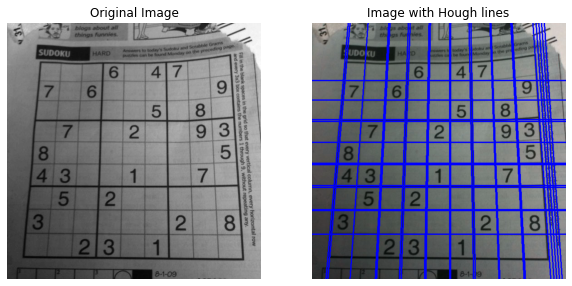

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('sudoku.png')
assert img is not None
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
    x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
    cv.line(img, (x1, y1), (x2, y2), (0,0,255),2)
    
figure, axis = plt.subplots(1,2, figsize = (10,5))
axis[0].imshow(gray, cmap = 'gray')
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(img, cmap = 'gray')
axis[1].axis('off')
axis[1].title.set_text('Image with Hough lines')

plt.show()

### Question 2
Fit Hough circles to the coins image in Fig.3.

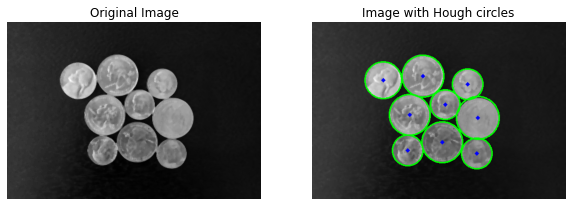

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('coins.jpg', 0)
assert img is not None

img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
figure, axis = plt.subplots(1,2, figsize = (10,5))
axis[0].imshow(img, cmap = 'gray')
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(cimg, cmap = 'gray')
axis[1].axis('off')
axis[1].title.set_text('Image with Hough circles')

plt.show()

### Question 3
Use generalized Hough transform to match the template with the image.

x = 29.0, y = 109.0, scale = 1.0, orientation 0.0, p1 = (4, 76), p2 = (54, 141)


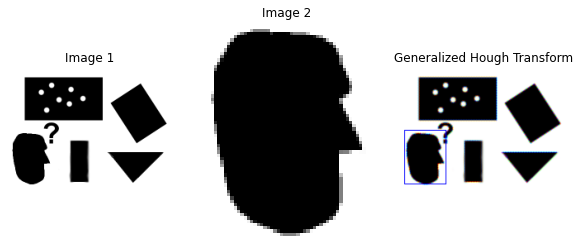

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ = cv.imread('templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None
    
im_edges = cv.Canny (img, 50, 250) 
templ_edges = cv.Canny (templ, 50, 250)
alg = cv.createGeneralizedHoughGuil() 
alg.setTemplate(templ_edges) 
alg.setAngleThresh(100000)
alg.setScaleThresh(40000) 
alg.setPosThresh(1000) 
alg.setAngleStep(1) 
alg.setScaleStep(0.1) 
alg.setMinScale(0.9 ) 
alg.setMaxScale(1.1) 
positions, votes = alg.detect(im_edges) 

out = cv.cvtColor(img, cv.COLOR_BAYER_BG2BGR) 
for x, y, scale, orientation in positions[0]: 
    halfHeight = templ.shape[0 ] / 2. * scale 
    halfwidth = templ.shape[1]/ 2. * scale 
    p1 = (int(x - halfwidth), int(y - halfHeight)) 
    p2 = (int(x + halfwidth), int(y + halfHeight)) 
    print("x = {}, y = {}, scale = {}, orientation {}, p1 = {}, p2 = {}".format (x, y, scale, orientation, p1, p2)) 
    cv.rectangle(out, pi, p2, (0,0,255))
    
figure, axis = plt.subplots(1,3, figsize = (10,5))
axis[0].imshow(img, cmap = 'gray')
axis[0].axis('off')
axis[0].title.set_text('Image 1')
axis[1].imshow(templ, cmap = 'gray')
axis[1].axis('off')
axis[1].title.set_text('Image 2')
axis[2].imshow(out, cmap = 'gray')
axis[2].axis('off')
axis[2].title.set_text('Generalized Hough Transform')
plt.show()

### Question 4
Using he given code (item no.1), experiment with various types of 2-D transformations.

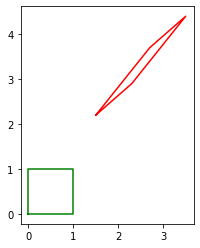

In [27]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 #Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

### Question 5 
Transform Graffiti img1.ppm onto img5.ppm using code in item no.2.

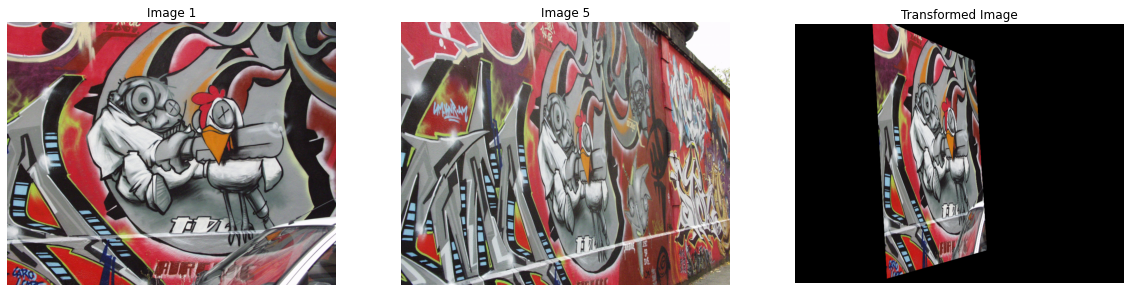

In [29]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

img1 = cv.imread ('img1.ppm', cv. IMREAD_ANYCOLOR) 
img5 = cv.imread('img5.ppm', cv. IMREAD_ANYCOLOR) 
H = np.array([[6.2544644e-01, 5.7759174e-02, 2.2201217e+02],
              [2.2240536e-01, 1.1652147e+00, -2.5605611e+01],
              [4.9212545e-04, -3.6542424e-05, 1.0000000e+00]]) 
imlto5 = cv.warpPerspective(img1, H, (950, 750)) 

figure, axis = plt.subplots(1,3, figsize = (20,20))
axis[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB ))
axis[0].axis('off')
axis[0].title.set_text('Image 1')
axis[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB ))
axis[1].axis('off')
axis[1].title.set_text('Image 5')
axis[2].imshow(cv.cvtColor(imlto5, cv.COLOR_BGR2RGB ))
axis[2].axis('off')
axis[2].title.set_text('Transformed Image')
plt.show()

### Question 6
Item no. 3 is for mouse clicking and selecting matching points in the two images to be stitched. Compute the homography using the relevant OpenCV function and carry out stitching.

### Question 7
Item no.4 is similar to item no.3. Here, compute the homography using your own code and stitch the two images.